In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
cd C:\Users\user\Desktop\Data Sets\

C:\Users\user\Desktop\Data Sets


In [3]:
df = pd.read_csv('literacy_birth_rate.csv')

df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1.324655e+09
1,Inde,ASI,50.8,2.682,1.139965e+09
2,USA,NAM,99.0,2.077,3.040600e+08
3,Indonésie,ASI,88.8,2.132,2.273451e+08
4,Brésil,LAT,90.2,1.827,1.919715e+08


In [4]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')


In [5]:
df.dtypes

country             object
continent           object
female_literacy    float64
fertility          float64
population         float64
dtype: object

In [6]:
df['fertility'].nunique()

157

In [7]:
df['female_literacy'].nunique()

116

In [8]:
df.isnull().sum()

country            0
continent          0
female_literacy    0
fertility          0
population         0
dtype: int64

In [9]:
df.describe()

,female_literacy,fertility,population
count,162.000000,162.000000,1.620000e+02
mean,80.107407,2.878673,4.068708e+07
std,23.052415,1.427597,1.409695e+08
min,12.600000,0.966000,1.035660e+05
25%,66.425000,1.823250,3.368292e+06
50%,90.000000,2.367500,9.707404e+06
75%,98.500000,3.880250,2.882991e+07
max,100.000000,7.069000,1.324655e+09


In [10]:
df['continent'].value_counts()

AF     49
ASI    47
EUR    36
LAT    24
OCE     4
NAM     2
Name: continent, dtype: int64

In [11]:
df['country'].value_counts()

Honduras        1
Zimbabwe        1
Venezuela       1
Kirghizistan    1
Cambodge        1
               ..
Madagascar      1
Sénégal         1
Bolivie         1
Ireland         1
New Zealand     1
Name: country, Length: 162, dtype: int64

In [12]:
cols = ['country', 'continent', 'female_literacy', 'fertility', 'population']

C:\Users\user\.conda\envs\dataS-venv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


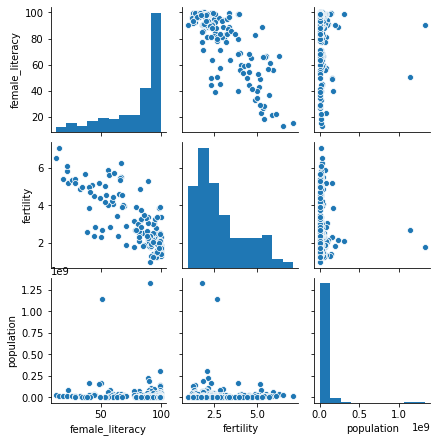

In [13]:
sns.pairplot(df[cols], size=2.0)

In [14]:
df.columns

Index(['country', 'continent', 'female_literacy', 'fertility', 'population'], dtype='object')

<h3>Calculating covariance</h3>

In [15]:
cols = ['female_literacy', 'fertility', 'population']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,3)].values)

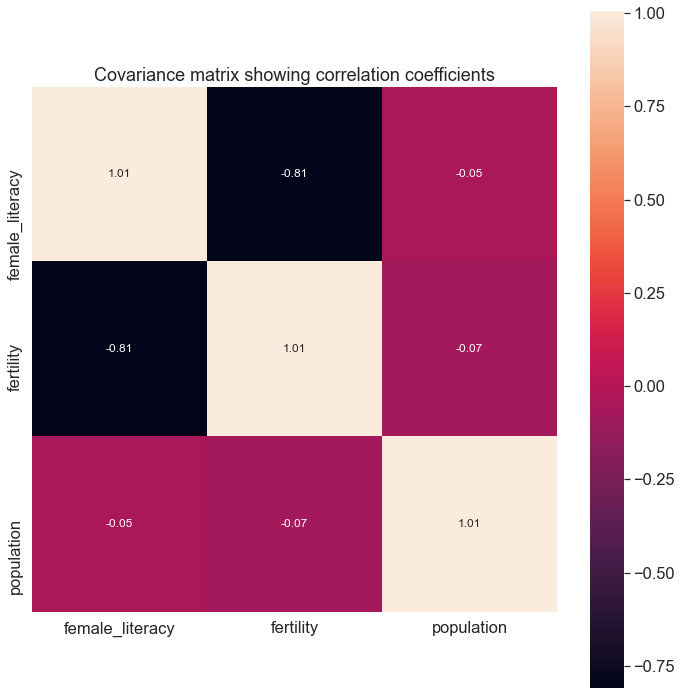

In [16]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

<h3>Applying ML algorithm</h3>

In [17]:
ln = LinearRegression()

In [18]:
#trying to predict for fertility using female literacy
x = df[['female_literacy']]
y = df[['fertility']]

In [19]:
#splitting dataframe to test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [20]:
#Training model using Linear Regression
ln.fit(x_train,y_train)


LinearRegression()

In [21]:

y_pred = ln.predict(x_test)

In [22]:
width = 12
height = 10

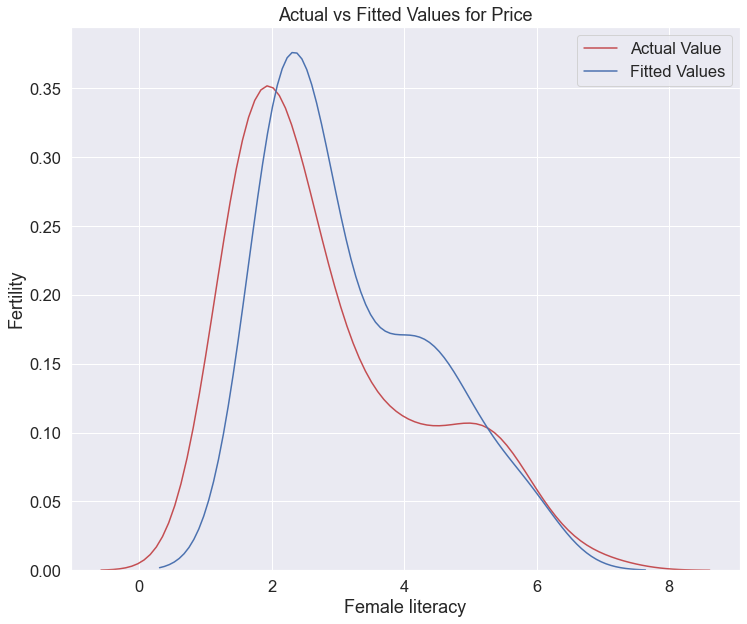

In [23]:

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['fertility'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Female literacy')
plt.ylabel('Fertility')

plt.show()
plt.close()

In [24]:
ln.intercept_

array([6.71736148])

In [25]:
ln.coef_

array([[-0.04775682]])

<h4>The final linear equation for the model is </h4>
    fertility = 6.71736148 - 0.04775682(female literacy)

<h3>Evaluating model</h3>

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

ln.score(x,y)

0.645458346963592

In [31]:
mean_squared_error(y_test, y_pred)

0.8677321076587949